## matrix operation

In [38]:
import numpy as np
A = np.array([[3,2,1],[5,-5,4],[6,0,1]])
b1 = np.array([1,2,3])
b2 = np.array([-1,2,-5])

In [39]:
A@b1 # 행렬곱

array([10,  7,  9])

# 과제 1

let $f(x,y) = e^{-(x^2+y^2)}sin(x)$ for $-2\leq x \leq 2$ and $-2 \leq y \leq 2$

1. make a contour plot of $f$
2. find the volume $|f(x,y)|$ in the specified x and y range
3. find the volume $|f(x,y)|$  only in the region where $\sqrt{x^2+y^2} > 0.5$


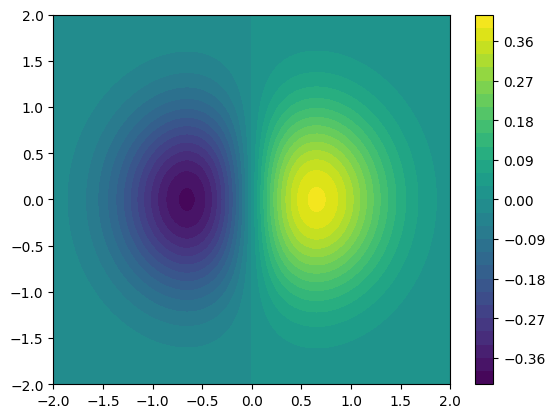

In [41]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
xv, yv = np.meshgrid(x, y)
zv = np.exp(-(xv**2 + yv**2))*np.sin(xv)

plt.contourf(xv, yv, zv, levels=30)
plt.colorbar()

In [42]:
V = np.trapz(np.trapz(np.abs(zv), x), y)
V

In [43]:
condition = np.sqrt(xv**2 + yv**2) > 0.5
xv2, yv2 = np.where(condition, xv, 0), np.where(condition, yv, 0)
zv2 = np.exp(-(xv2**2 + yv2**2))*np.sin(xv2)
V2 = np.trapz(np.trapz(np.abs(zv2), x), y)
V2

2 번 문제 
$3V_1+2V_2+3V_3+10V_4 = 4$  
$2V_1-2V_2+5V_3+8V_4 = 1$  
$3V_1+3V_2+4V_3+9V_4 = 3$  
$3V_1+4V_2-3V_3-7V_4 = 2$  
find all the voltages

In [44]:
matrix = np.array([
    [3,2,3,10],
    [2,-2,5,8],
    [3,3,4,9],  
    [3,4,-3,-7]
])
target = np.array([4,1,3,2])
base = np.linalg.solve(matrix, target)
base

# EX..
# zeros = np.array([0,0,0,0])
# varies = np.linalg.solve(matrix, zeros)
# varies

array([ 0.78378378,  0.03603604, -0.67567568,  0.36036036])

3번 문제 
An electric field is given by   

$ \vec{E}(x,t) = E_0cos(z-t)\hat{x} + 2E_0cos(z-t+\pi/2)\hat{y}$    

1. find the magnetic field for all $z\in [0,4\pi] $ and $t \in [0,10]$ using $c\vec{B}(z,t) = \vec{z}\times\vec{E}(z,t)$
2. compute the pointing vector $\vec{S} = \vec{E} \times \vec{B}$ for all $z$ and $t$

In [45]:
z = np.linspace(0, np.pi * 4, 1000)
t = np.linspace(0, 10, 1000)
X = np.cos(z-t)
Y = 2*np.cos(z-t+np.pi/2) 
Z = 0
xv, yv, zv = np.meshgrid(X, Y, Z)

E = np.concatenate((xv,yv,zv), axis=2)


B = np.concatenate((yv,-xv,zv), axis=2) # z cross x = y, z cross y = -x
B

array([[[ 1.22464680e-16, -1.00000000e+00,  0.00000000e+00],
        [ 1.22464680e-16, -9.99996700e-01,  0.00000000e+00],
        [ 1.22464680e-16, -9.99986801e-01,  0.00000000e+00],
        ...,
        [ 1.22464680e-16,  8.36265352e-01,  0.00000000e+00],
        [ 1.22464680e-16,  8.37671205e-01,  0.00000000e+00],
        [ 1.22464680e-16,  8.39071529e-01,  0.00000000e+00]],

       [[-5.13787346e-03, -1.00000000e+00,  0.00000000e+00],
        [-5.13787346e-03, -9.99996700e-01,  0.00000000e+00],
        [-5.13787346e-03, -9.99986801e-01,  0.00000000e+00],
        ...,
        [-5.13787346e-03,  8.36265352e-01,  0.00000000e+00],
        [-5.13787346e-03,  8.37671205e-01,  0.00000000e+00],
        [-5.13787346e-03,  8.39071529e-01,  0.00000000e+00]],

       [[-1.02757130e-02, -1.00000000e+00,  0.00000000e+00],
        [-1.02757130e-02, -9.99996700e-01,  0.00000000e+00],
        [-1.02757130e-02, -9.99986801e-01,  0.00000000e+00],
        ...,
        [-1.02757130e-02,  8.36265352e-01,

In [46]:
S = np.cross(E,B)
S

array([[[ 0.        ,  0.        , -1.        ],
        [ 0.        ,  0.        , -0.9999934 ],
        [ 0.        ,  0.        , -0.9999736 ],
        ...,
        [ 0.        ,  0.        , -0.69933974],
        [ 0.        ,  0.        , -0.70169305],
        [ 0.        ,  0.        , -0.70404103]],

       [[ 0.        , -0.        , -1.0000264 ],
        [ 0.        , -0.        , -1.0000198 ],
        [ 0.        , -0.        , -1.        ],
        ...,
        [-0.        ,  0.        , -0.69936614],
        [-0.        ,  0.        , -0.70171944],
        [-0.        ,  0.        , -0.70406743]],

       [[ 0.        , -0.        , -1.00010559],
        [ 0.        , -0.        , -1.00009899],
        [ 0.        , -0.        , -1.00007919],
        ...,
        [-0.        ,  0.        , -0.69944533],
        [-0.        ,  0.        , -0.70179864],
        [-0.        ,  0.        , -0.70414662]],

       ...,

       [[ 0.        , -0.        , -2.20264105],
        [ 0


고유값 구하기 $\begin{bmatrix} 1&2\\ 2&2 \end{bmatrix} $ .

In [47]:
from sympy import Matrix

Matrix([[1,2],[2,2]]).eigenvals() # 값과 중복해 개수
Matrix([[1,2],[2,2]]).eigenvects()